In [2]:
import pandas as pd

df = pd.read_csv("titanic-data2.csv")

look at data

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.shape

(891, 12)

drop irrelevant column, fix the age smaller than 1 and check the data


In [8]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [9]:
df = df.dropna(axis=0)

In [10]:
df[df['Age'] < 1] = 1

In [11]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [12]:
df[df['Sex'] == 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
78,1,1,1,1.0,1,1,1.0
305,1,1,1,1.0,1,1,1.0
469,1,1,1,1.0,1,1,1.0
644,1,1,1,1.0,1,1,1.0
755,1,1,1,1.0,1,1,1.0
803,1,1,1,1.0,1,1,1.0
831,1,1,1,1.0,1,1,1.0


In [13]:
df = df.drop(df[df['Sex'] == 1].index)

data visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

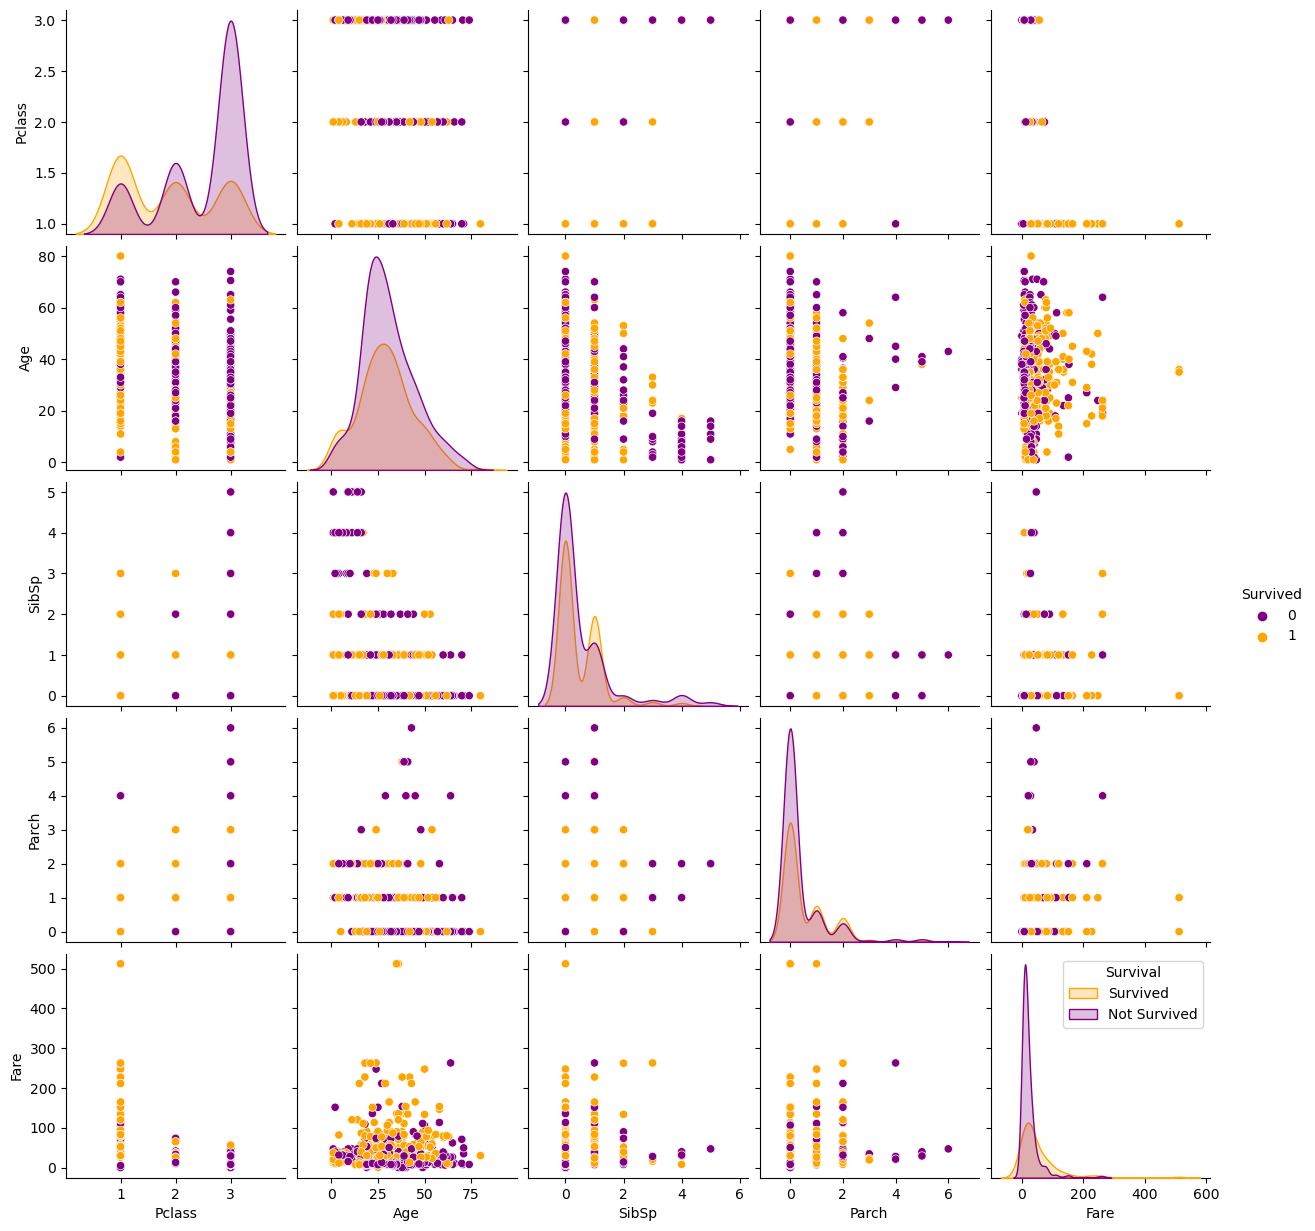

In [57]:
legend_labels = ['Survived', 'Not Survived']
sns.pairplot(df, hue="Survived")
plt.legend(title='Survival', labels=legend_labels)
plt.show()

In [16]:
num_passengers = df.shape[0]
print("Number of passengers in Titanic dataset:", num_passengers)

Number of passengers in Titanic dataset: 707


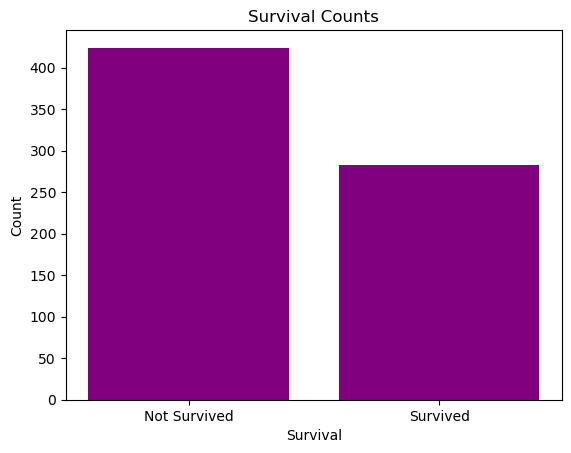

In [58]:
survived_counts = df['Survived'].value_counts()

plt.bar(survived_counts.index, survived_counts.values)
plt.xticks(survived_counts.index, ['Not Survived', 'Survived'])
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Survival Counts')
plt.show()

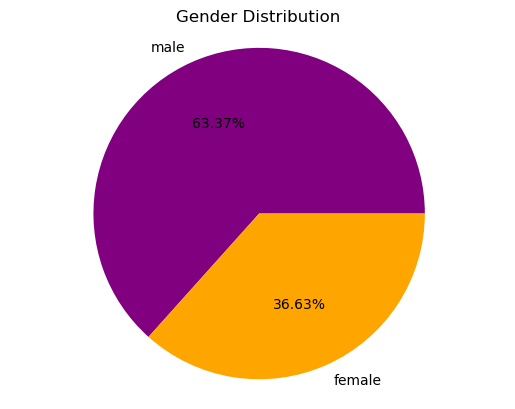

In [59]:
gender_counts = df['Sex'].value_counts()

plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('Gender Distribution')
plt.show()

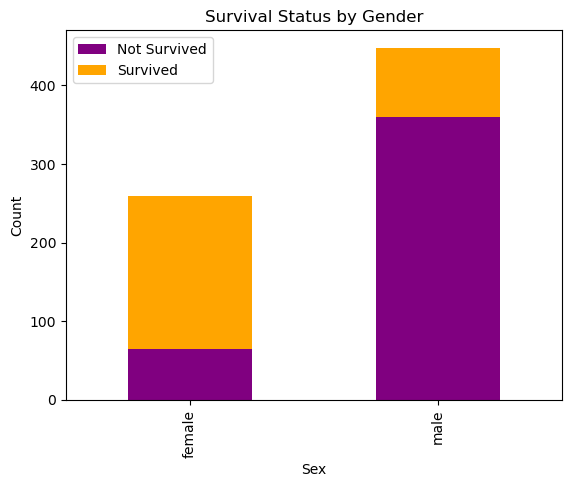

In [64]:
survival_counts = pd.crosstab(df['Sex'], df['Survived'])

fig, ax = plt.subplots()

survival_counts.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Survival Status by Gender')
ax.legend(['Not Survived', 'Survived'])
plt.show()

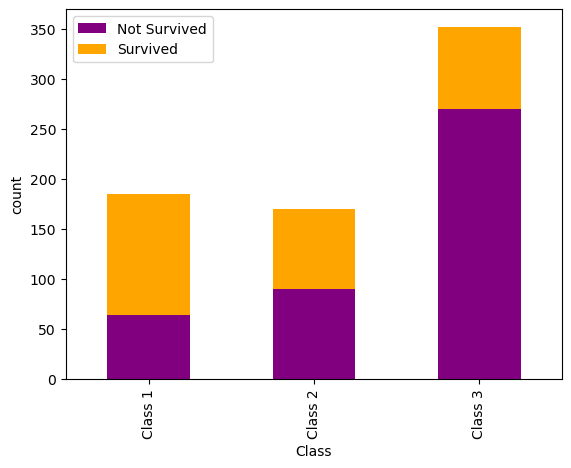

In [93]:
survival_counts = pd.crosstab(df['Pclass'], df['Survived'])
survival_counts.index = ['Class 1', 'Class 2', 'Class 3']
fig, ax = plt.subplots()

survival_counts.plot(kind='bar', stacked = True, ax = ax)
ax.legend(['Not Survived', 'Survived'])
ax.set_xlabel('Class')
ax.set_ylabel('count')
plt.show()

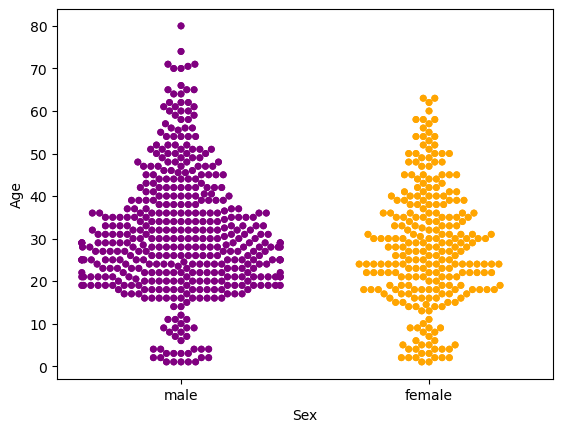

In [95]:
sns.swarmplot(  y="Age", x= "Sex", data=df)
plt.show()

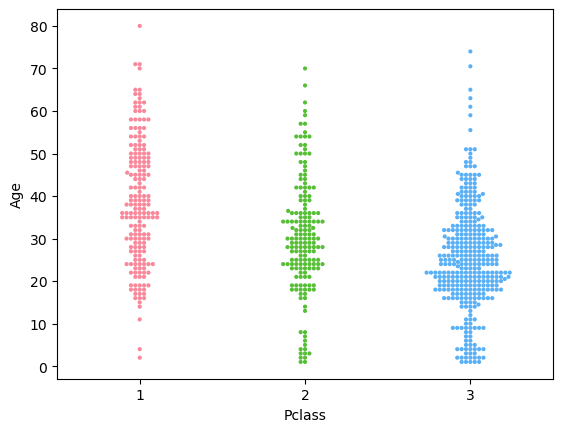

In [98]:
sns.swarmplot(  y="Age", x= "Pclass", data=df, size=3)
plt.show()

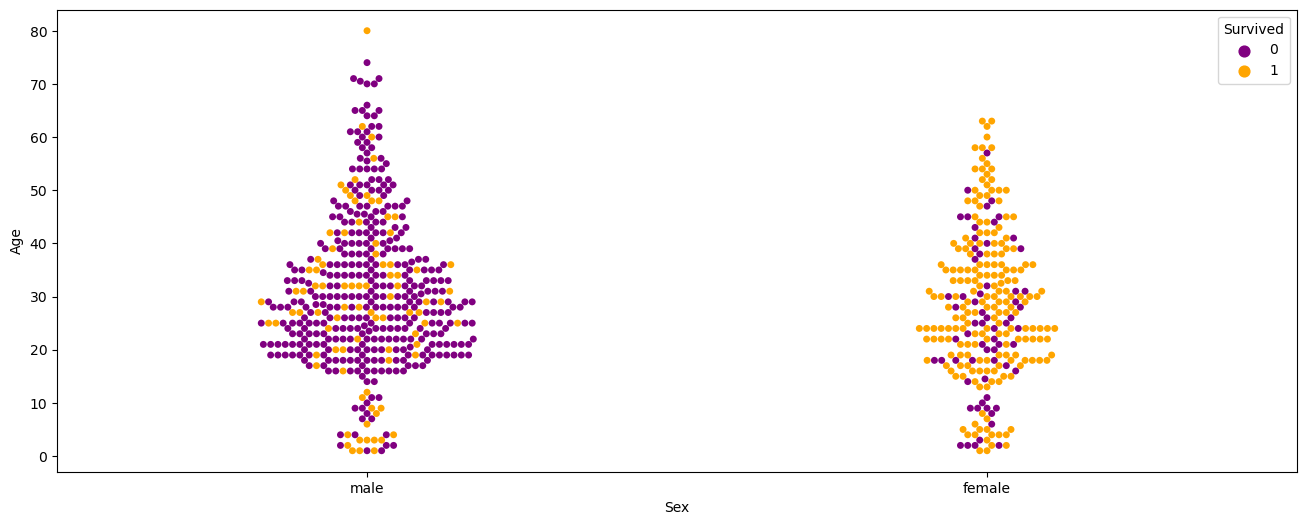

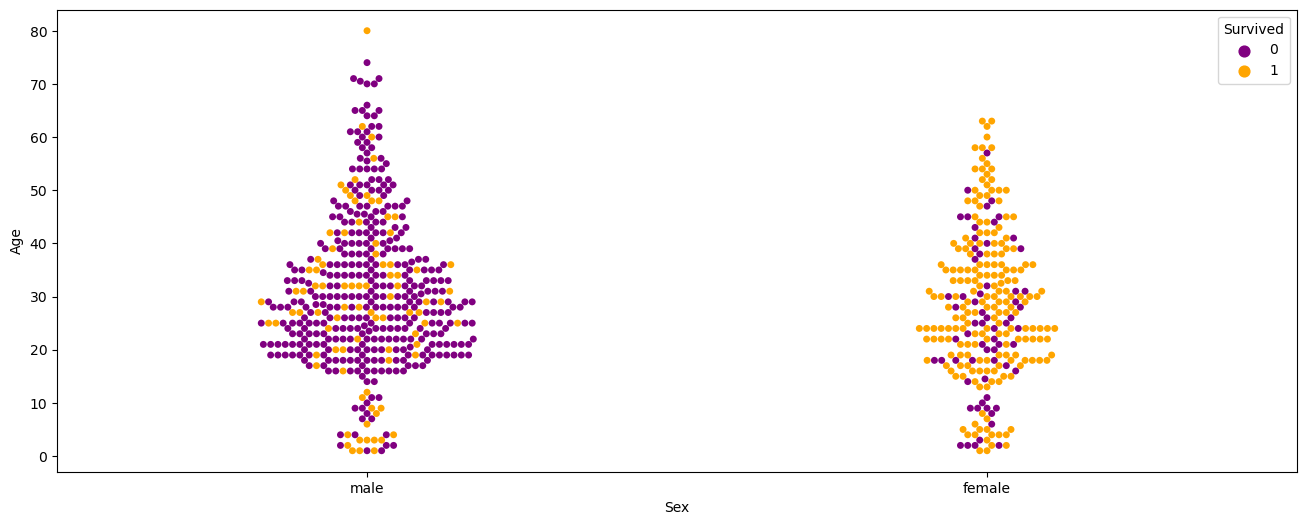

In [113]:
plt.figure(figsize=(16, 6))
sns.swarmplot(  y="Age", x= "Sex", hue='Survived',data=df)
plt.show()

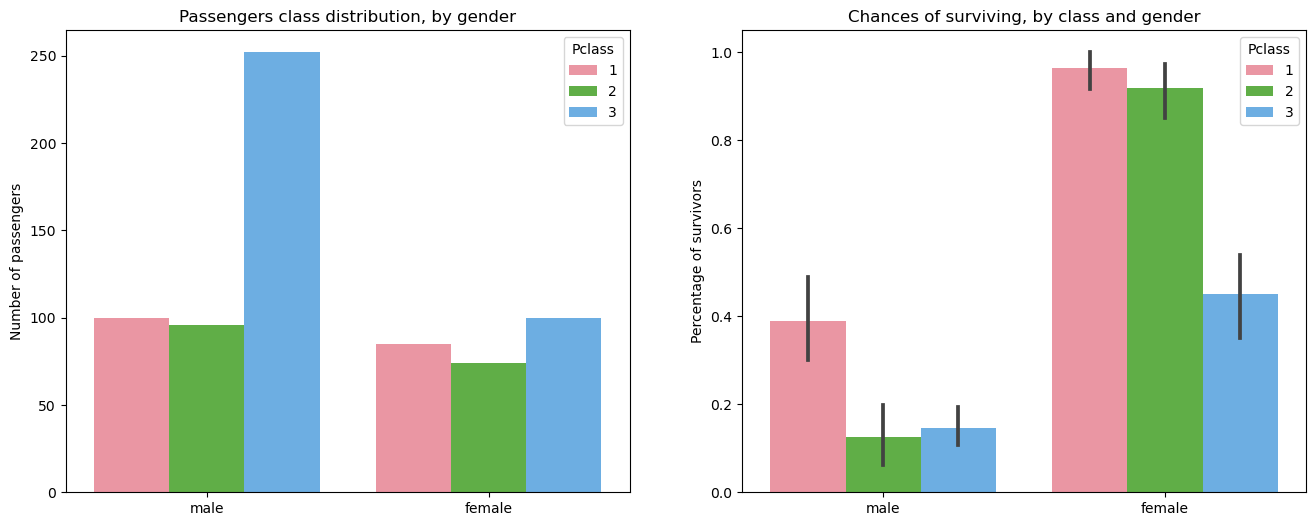

Sex     Pclass
female  1          85
        2          74
        3         100
male    1         100
        2          96
        3         252
Name: Survived, dtype: int64

Sex     Pclass
female  1         0.964706
        2         0.918919
        3         0.450000
male    1         0.390000
        2         0.125000
        3         0.146825
Name: Survived, dtype: float64


In [107]:
pclass_total = df.groupby(['Sex', 'Pclass']).count()['Survived']
pclass_survived = df.groupby(['Sex', 'Pclass']).sum()['Survived']

pct_pclass = pclass_survived / pclass_total

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

sns.countplot(x="Sex", hue="Pclass", data=df, ax=ax1)
ax1.set_title("Passengers class distribution, by gender")
ax1.set_xlabel("")
ax1.set_ylabel("Number of passengers")

sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df, ax=ax2)
ax2.set_title("Chances of surviving, by class and gender")
ax2.set_xlabel("")
ax2.set_ylabel("Percentage of survivors")

plt.show()

print (pclass_total)
print ("")
print (pct_pclass)

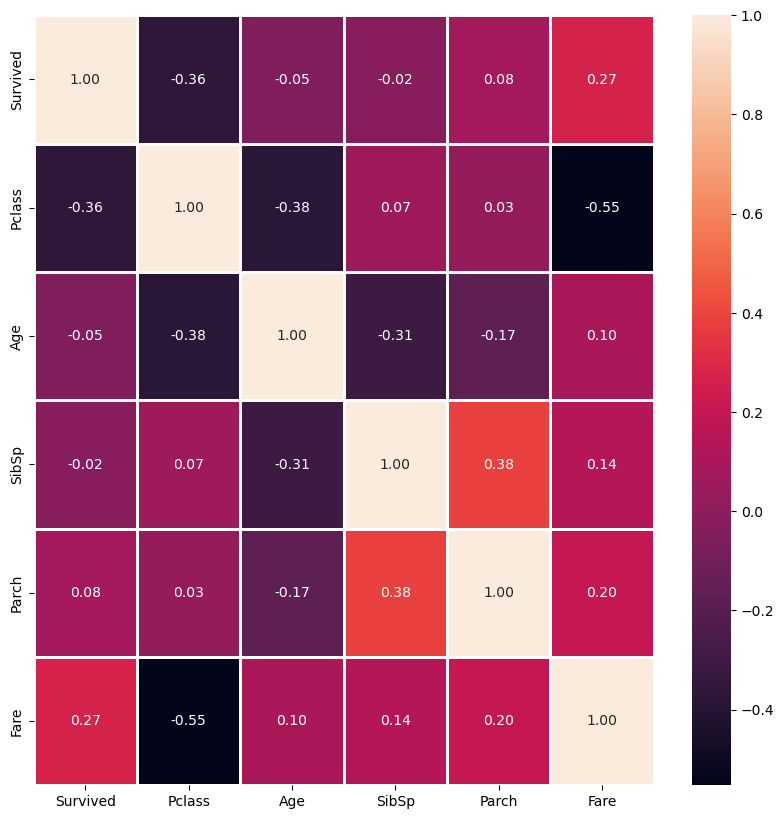

In [111]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

# Conclusion


After looking at the visualization, we can say that there are many fectors affecting the survival bility such as age, class and sex.  

There are three classes. class 1, class 2 and class 3 respectively. When we look at the survival rate of the classes, we see that the survival rate of class 1 is the highest, followed by class 2 and class 3 being the lowest survival rate.

We see that there are a lot of male passengers than female passengers. When the survival rate is compared with the sex of the pessengers, we see that the survival rate of being a female is far more higher than male.



In [115]:
df.to_csv("ml_titanicData.csv", index=False)